In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('daily_dataset.csv')
data.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


In [ ]:
data = pd.read_csv('daily_dataset.csv')
columns = ['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']

data.drop('LCLid',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)

data.head()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0.4850,0.432045,0.868,22.0,0.239146,9.505,0.072
1,0.1415,0.296167,1.116,48.0,0.281471,14.216,0.031
2,0.1015,0.189812,0.685,48.0,0.188405,9.111,0.064
3,0.1140,0.218979,0.676,48.0,0.202919,10.511,0.065
4,0.1910,0.325979,0.788,48.0,0.259205,15.647,0.066


In [ ]:
data.dropna(inplace=True)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
best_k = None
lowest_reconstruction_error = float('inf')

k_values = range(100, 1701, 100)
reconstruction_errors = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    reconstructed_data = scaler.inverse_transform(kmeans.cluster_centers_[cluster_labels])
    reconstruction_error = np.mean(np.square(data.values - reconstructed_data))
    reconstruction_errors.append(reconstruction_error)

    if reconstruction_error < lowest_reconstruction_error:
        lowest_reconstruction_error = reconstruction_error
        best_k = k


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best k: 1700
Lowest Reconstruction Error: 0.026737606435833765


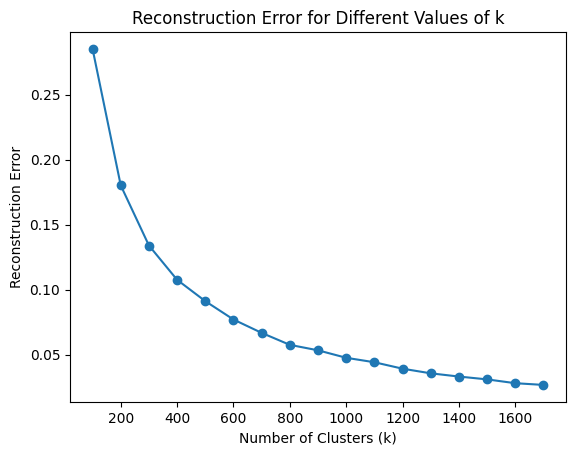

In [ ]:
print("Best k:", best_k)
print("Lowest Reconstruction Error:", lowest_reconstruction_error)

plt.plot(k_values, reconstruction_errors, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Different Values of k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

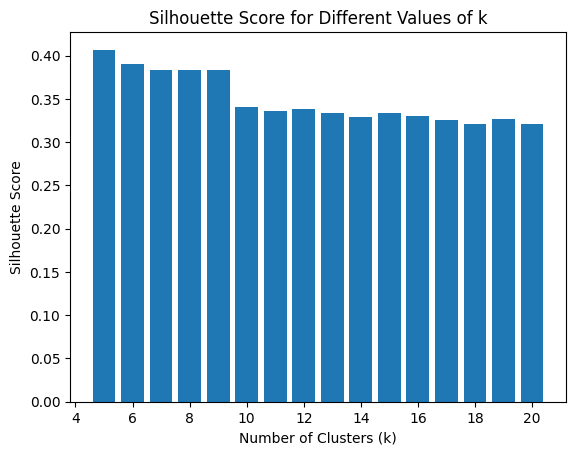

In [ ]:
from sklearn.metrics import silhouette_score
data.dropna(inplace=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

best_k = None
best_silhouette = -1

for k in range(5, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)

    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

k_values = range(5, 21)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.bar(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

In [ ]:
columns = data.columns[:-1]
cluster_representatives = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=columns)

transmitted_data = cluster_representatives

silhouette_avg = silhouette_score(data_scaled, cluster_labels)


print("Silhouette Coefficient: {:.4f}".format(silhouette_avg))


original_data_size = len(data) * len(data.columns)
transmitted_data_size = len(transmitted_data) * len(transmitted_data.columns)
data_reduction = 100 * (1 - transmitted_data_size / original_data_size)

print("Transmitted Data:")
print(transmitted_data)
print("Data Reduction Accuracy: {:.2f}%".format(data_reduction))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficient: 0.4067
Transmitted Data:
   energy_median  energy_mean  energy_max  energy_count  energy_std  \
0       0.192341     0.301907    1.401196     47.990165    0.304787   
1       0.793148     0.914376    2.303690     48.000000    0.392627   
2       0.619881     0.780010    2.611511     47.995812    0.631078   
3       0.089494     0.117430    0.468900     47.987757    0.094034   
4       0.487321     0.561219    1.810500     25.785714    0.383108   

   energy_sum  energy_min  
0   14.488524    0.056810  
1   43.890047    0.590568  
2   37.437474    0.133123  
3    5.634799    0.036239  
4   14.487643    0.125714  
Data Reduction Accuracy: 99.96%


In [ ]:
original_data = scaler.inverse_transform(transmitted_data)

df_original_data = pd.DataFrame(original_data, columns=data.columns[:-1])

print(df_original_data.head())


   energy_median  energy_mean  energy_max  energy_count  energy_std  \
0       0.233414     0.337712    2.243524     88.311297    0.291220   
1       0.358361     0.480340    2.999439     88.319567    0.308191   
2       0.322327     0.449050    3.257265     88.316045    0.354258   
3       0.212025     0.294752    1.462647     88.309273    0.250504   
4       0.294760     0.398099    2.586351     69.641157    0.306352   

   energy_sum  energy_min  
0  174.364957    0.070004  
1  502.195173    0.120151  
2  430.248279    0.077174  
3   75.644949    0.068071  
4  174.355135    0.076478  


In [ ]:

plt.plot(k_values, reconstruction_errors, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Different Values of k')
plt.show()

NameError: ignored

ValueError: ignored

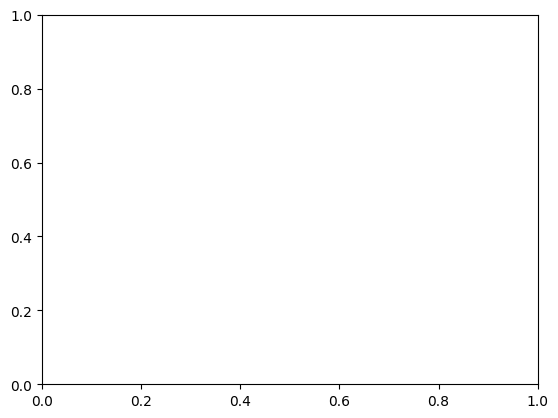

In [ ]:

reconstruction_error = reconstruction_error.reshape(-1, 1)

plt.plot(k_values, reconstruction_error, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Different Values of k')
plt.show()

ValueError: ignored

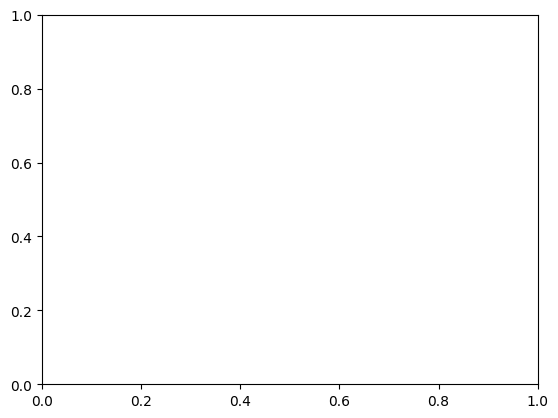

In [ ]:

plt.plot(k_values, reconstruction_error, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Different Values of k')
plt.show()

In [ ]:
cluster_representatives = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=data.columns[:-1])


In [ ]:

reconstruction_error = reconstruction_error(data, kmeans)

print("Reconstruction Error: {:.4f}".format(reconstruction_error))

TypeError: ignored

In [ ]:
reconstruction_error = -kmeans.score(data_scaled)


print("Reconstruction Error:", reconstruction_error)

Reconstruction Error: 16747.24722480118


In [ ]:
original_data = scaler.inverse_transform(transmitted_data)


reconstruction_error = np.sum((data_scaled - original_data) ** 2)


print("Reconstruction Error: {:.4f}".format(reconstruction_error))

ValueError: ignored